## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten
# Datenanalyse der Hauptstudie 2018

#### Daten importieren

In [108]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
sns.set(style="white") #"whitegrid", "darkgrid"...
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [110]:
Daten.shape

(401, 377)

In [111]:
Daten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b2a,D-Q8b4a,D-Q8b7a,D-Q8b8a,D-Q8b10a_7,D-Q8b11a,D-Q8b17a,D-Q8b18a,D-Q8b19a,D-Q8b22a
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Glossar erstellen

Datei aufrufen, die in einem anderem Notebook erstellt und gespeichert wurde

In [112]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

Funktion, um Index (Name) einer Bezeichnung im Glossar zu finden:

In [113]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

Funktion, um Bezeichnung von Index im Glossar zu finden:

In [114]:
def get_name_glossind(word):
    for i, val in enumerate(gloss.index):
        if word.lower() in str(val).lower():
            return i, gloss.loc[val][0]

In [115]:
get_name_glossind('A-Q1')

(17,
 'Probablemente, en este texto encuentre palabras o grupos de palabras que no conoce aún. Sin embargo, seguro que logra entender algunas de estas palabras nuevas sin ayuda, bien enseguida o después de pensar un poco. Lea el texto y piense qué hace para descubrir el significado o la función de las palabras que desconoce. También puede pensar en otras situaciones en las que se haya encontrado con vocabulario nuevo.  ¿Qué estrategias o técnicas usa para averiguar el significado de palabras desconocidas? ¿Qué características de las palabras, frases o textos le ayudan?               Apunte todas sus ideas aquí:')

#### Untergruppen und Listen für die Analyse

In [116]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [117]:
Daten_A3.shape

(396, 377)

In [118]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [119]:
Finished.shape

(391, 377)

In [214]:
Hauptstudie = Daten[Daten['pilot']!=1]

In [220]:
Hauptstudie_A3 = Hauptstudie[Hauptstudie['A-Q3_27'] >= 1]

In [221]:
Hauptstudie_fin = Hauptstudie[Hauptstudie['C-Q1_7'] >= 1]

Item-Listen erstellen:

In [120]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [121]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [122]:
Liste_C_Q1 = [col for col in Daten.columns if 'C-Q1' in col]

##### Visualisierung

Funktion für Darstellung mehrerer Histogramme:

In [123]:
def graf_hist(D,l,sx,sy,nrow,ncol):
    fig = plt.figure(figsize=(sx,sy))
    for i, col in enumerate(l):
        plt.subplot(nrow,ncol,i+1)
        plt.hist(D[col].dropna(),color = '#0063A6')
        plt.xticks([1,2,3,4,5])
        plt.title(col,size=13)
    plt.show()

Funktion für Darstellung der Likert-Skalen:

In [124]:
def graf_likert(D,l,sy):

    likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

    df = D[l].apply(pd.value_counts).T
    middles = df[[1, 2]].sum(axis=1)+df[3]*.5
    longest = middles.max()
    complete_longest = df.sum(axis=1).max()
    df.insert(0, '', (middles - longest).abs())

    df.plot.barh(stacked=True, figsize=(8,sy), color=likert_colors, edgecolor='none', legend=False)
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)

    plt.show()

### Cronbach's Alpha berechnen

In [126]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    calpha = nitems / float(nitems-1) * (1 - itemvars.sum() / float(tscores.var(ddof=1)))

    return calpha

In [219]:
CronbachAlpha(Hauptstudie[Liste_A_Q2])

0.27143564250330227

In [127]:
CronbachAlpha(Daten[Liste_A_Q2])

0.3018915225555093

In [222]:
CronbachAlpha(Hauptstudie_A3[Liste_A_Q3])

0.883768307699594

In [223]:
CronbachAlpha(Daten_A3[Liste_A_Q3])

0.8845773413596196

In [224]:
CronbachAlpha(Hauptstudie_fin[Liste_C_Q1])

0.4922372666891664

In [225]:
CronbachAlpha(Finished[Liste_C_Q1])

0.4896684535094027

In [130]:
Liste_A_Q = Liste_A_Q2 + Liste_A_Q3

In [131]:
Liste_AC_Q = Liste_A_Q + Liste_C_Q1

In [226]:
CronbachAlpha(Hauptstudie[Liste_AC_Q])

0.9045546881651827

In [227]:
CronbachAlpha(Daten[Liste_AC_Q])

0.918340317521501

### Zeitanalyse

In [228]:
Dur = pd.to_numeric(Hauptstudie[Hauptstudie['Finished']==1]['Duration (in seconds)'])

In [229]:
Dur.describe()

count       324.000000
mean       4415.206790
std       32355.656749
min         346.000000
25%         740.500000
50%        1100.500000
75%        1457.750000
max      535186.000000
Name: Duration (in seconds), dtype: float64

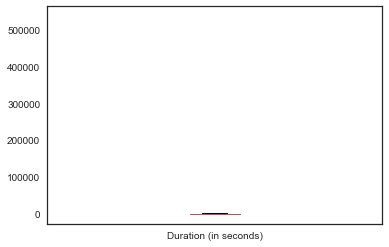

In [230]:
Dur.plot.box();

Überblick über die Beantwortungszeit und Darstellung in einem Boxplot, um Outlyers zu erkennen -> sollen nicht mit berücksichtigt werden (z.B. TN, die an einem Tag begonnen und später beendet haben...)

sinnvoll ist, eine Grenze bei ca. einer Stunde Beantwortungszeit (3600 sek) festzulegen

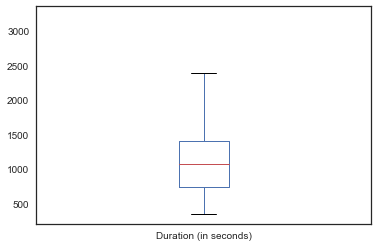

In [231]:
Dur[Dur < 4000].plot.box();

In [232]:
Dur[Dur < 4000].describe()

count     313.000000
mean     1116.124601
std       497.223716
min       346.000000
25%       731.000000
50%      1069.000000
75%      1404.000000
max      3215.000000
Name: Duration (in seconds), dtype: float64

In [233]:
(Dur[Dur < 4000].mean())/60

18.602076677316294

Schlussfolgerung:

durchschnittliche Beantwortungszeit liegt bei ca. 18,5 min, wobei berücksichtigt werden muss, dass TN außerhalb des Unterrichts Pausen einlegen konnten und dass z.T. bei der Beantwortung im Unterricht mehr Zeit für Erklärungen/Einloggen/Abwarten... verwendet wurde

### Analyse der Strategiennutzung

#### A-Q2 (7 Hauptbereiche)

In [139]:
Daten[Liste_A_Q2].describe()

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2.528678,3.553616,3.865337,4.067332,3.431421,3.229426,4.301746
std,1.083882,0.847197,0.962715,0.986385,1.002951,1.182046,0.875341
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000
75%,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


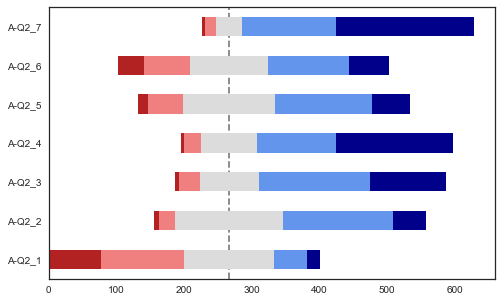

In [140]:
graf_likert(Daten,Liste_A_Q2,5)

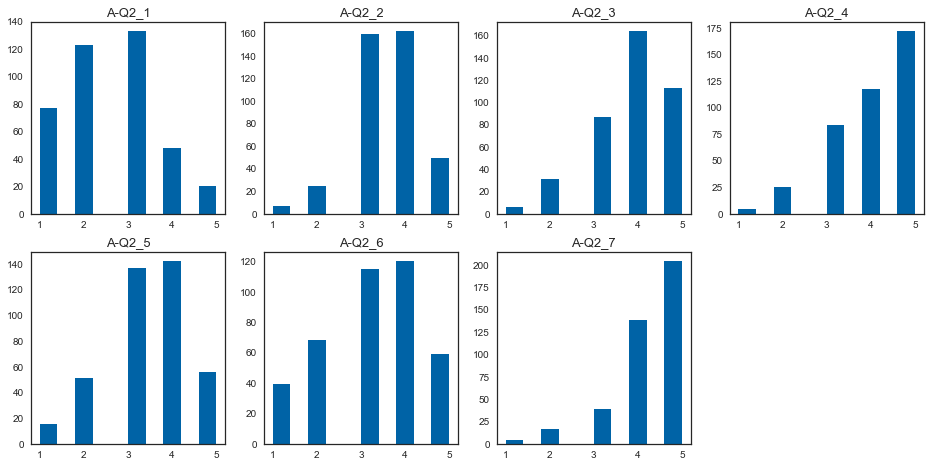

In [141]:
graf_hist(Daten,Liste_A_Q2,16,12,3,4)

1
Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna.

2
Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas.

3
Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. 

4
Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto.

5
Pido ayuda a mi profesor/a.

6
Pido ayuda a mis compañeros/as de clase.

7
Consulto un diccionario u otra fuente (en papel o digital).


In [142]:
Daten[Liste_A_Q2].mean().sort_values(ascending = False)

A-Q2_7    4.301746
A-Q2_4    4.067332
A-Q2_3    3.865337
A-Q2_2    3.553616
A-Q2_5    3.431421
A-Q2_6    3.229426
A-Q2_1    2.528678
dtype: float64

Korrelation in A-Q2:

In [237]:
Korr_A_Q2 = Daten[Liste_A_Q2].corr(method = 'spearman')
Korr_A_Q2 = Korr_A_Q2.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_A_Q2

,A-Q2_1,A-Q2_2,A-Q2_3,A-Q2_4,A-Q2_5,A-Q2_6,A-Q2_7
A-Q2_1,1,0.297221,0.0690837,0.0545192,-0.0723705,-0.0595766,-0.112656
A-Q2_2,0.297221,1,0.263749,0.17788,-0.0133953,-0.0910972,-0.179569
A-Q2_3,0.0690837,0.263749,1,0.497669,-0.0826049,-0.161562,0.0951848
A-Q2_4,0.0545192,0.17788,0.497669,1,-0.0562487,-0.112454,0.0580161
A-Q2_5,-0.0723705,-0.0133953,-0.0826049,-0.0562487,1,0.476382,0.0974701
A-Q2_6,-0.0595766,-0.0910972,-0.161562,-0.112454,0.476382,1,0.0994108
A-Q2_7,-0.112656,-0.179569,0.0951848,0.0580161,0.0974701,0.0994108,1


#### A-Q3 (31 Einzelstrategien)

In [146]:
Daten_A3[Liste_A_Q3].describe()

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,...,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.00000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,3.055556,3.967172,2.977273,2.924242,2.575758,3.747475,3.568182,3.633838,3.957071,3.792929,...,4.237374,2.717172,3.75000,3.603535,3.277778,3.638889,3.919192,3.545455,3.646465,3.487374
std,1.208386,0.963345,1.341448,1.183994,1.237318,1.087032,1.146441,1.166957,1.048531,1.044601,...,0.873936,1.173897,1.11179,1.091689,1.117688,1.276230,0.992904,1.084041,1.091399,1.195918
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,2.000000,3.00000,3.000000,2.750000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.00000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,...,5.000000,3.000000,5.00000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


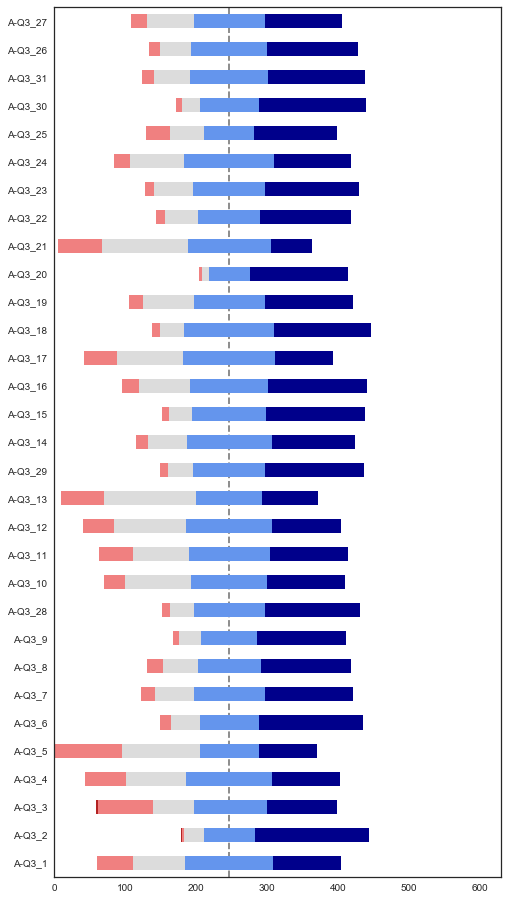

In [147]:
graf_likert(Daten_A3,Liste_A_Q3,16)

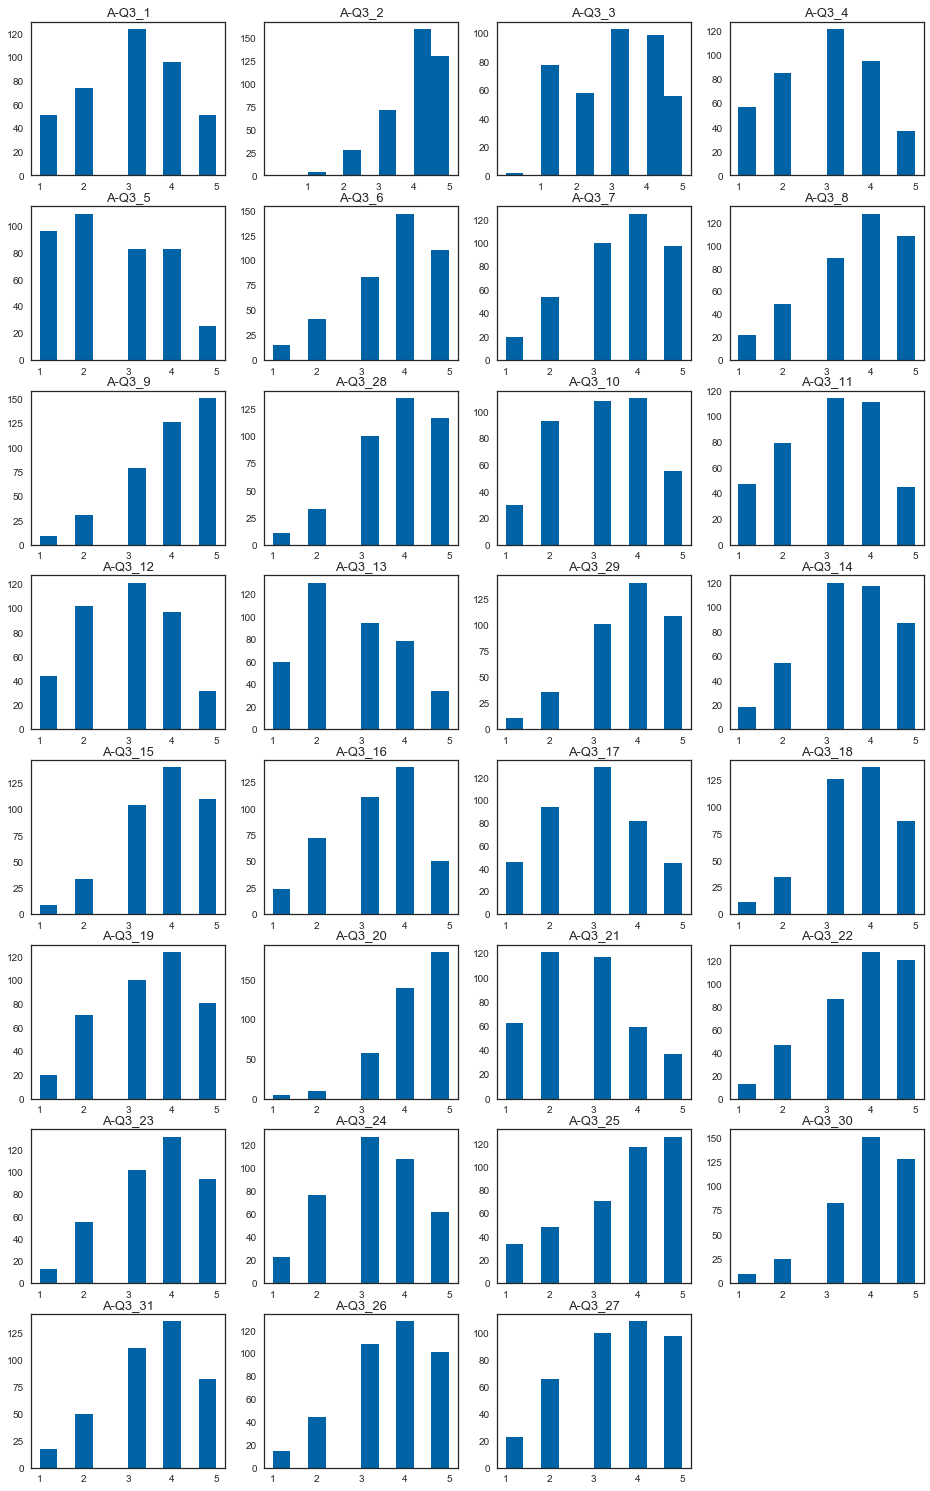

In [148]:
graf_hist(Daten_A3,Liste_A_Q3,16,30,9,4)

In [149]:
Daten_A3[Liste_A_Q3].mean().sort_values(ascending = False)

A-Q3_20    4.237374
A-Q3_2     3.967172
A-Q3_9     3.957071
A-Q3_30    3.919192
A-Q3_28    3.792929
A-Q3_15    3.780303
A-Q3_29    3.752525
A-Q3_22    3.750000
A-Q3_6     3.747475
A-Q3_26    3.646465
A-Q3_18    3.641414
A-Q3_25    3.638889
A-Q3_8     3.633838
A-Q3_23    3.603535
A-Q3_7     3.568182
A-Q3_31    3.545455
A-Q3_14    3.507576
A-Q3_27    3.487374
A-Q3_19    3.441919
A-Q3_16    3.300505
A-Q3_24    3.277778
A-Q3_10    3.169192
A-Q3_11    3.070707
A-Q3_1     3.055556
A-Q3_3     2.977273
A-Q3_17    2.964646
A-Q3_12    2.926768
A-Q3_4     2.924242
A-Q3_13    2.737374
A-Q3_21    2.717172
A-Q3_5     2.575758
dtype: float64

In [150]:
get_name_glossind('A-Q3_20')

(47, 'A-Q3 - Utilizo el sentido común y mis conocimientos generales.')

In [151]:
Daten_A3[Liste_A_Q3].std().sort_values()

A-Q3_20    0.873936
A-Q3_2     0.963345
A-Q3_30    0.992904
A-Q3_18    1.007668
A-Q3_15    1.016181
A-Q3_29    1.040627
A-Q3_28    1.044601
A-Q3_9     1.048531
A-Q3_31    1.084041
A-Q3_6     1.087032
A-Q3_26    1.091399
A-Q3_23    1.091689
A-Q3_16    1.092251
A-Q3_22    1.111790
A-Q3_14    1.112617
A-Q3_24    1.117688
A-Q3_12    1.126073
A-Q3_7     1.146441
A-Q3_19    1.149204
A-Q3_10    1.160166
A-Q3_8     1.166957
A-Q3_17    1.168690
A-Q3_21    1.173897
A-Q3_4     1.183994
A-Q3_11    1.186443
A-Q3_13    1.187154
A-Q3_27    1.195918
A-Q3_1     1.208386
A-Q3_5     1.237318
A-Q3_25    1.276230
A-Q3_3     1.341448
dtype: float64

Korrelation in A-Q3:

In [238]:
Korr_A_Q3 = Daten[Liste_A_Q3].corr(method = 'spearman')
Korr_A_Q3 = Korr_A_Q3.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_A_Q3

,A-Q3_1,A-Q3_2,A-Q3_3,A-Q3_4,A-Q3_5,A-Q3_6,A-Q3_7,A-Q3_8,A-Q3_9,A-Q3_28,A-Q3_10,A-Q3_11,A-Q3_12,A-Q3_13,A-Q3_29,A-Q3_14,A-Q3_15,A-Q3_16,A-Q3_17,A-Q3_18,A-Q3_19,A-Q3_20,A-Q3_21,A-Q3_22,A-Q3_23,A-Q3_24,A-Q3_25,A-Q3_30,A-Q3_31,A-Q3_26,A-Q3_27
A-Q3_1,1,0.364282,0.290403,0.185472,0.232093,0.0509879,0.0345282,0.0125075,0.0475972,0.0674412,0.0732063,0.108969,0.0742346,0.110563,0.00456301,-0.0306966,-0.013599,-0.044243,0.164835,0.152897,0.141468,0.171385,0.0411164,0.0555242,0.0273309,0.077014,0.0362418,0.0550528,0.0814445,0.136283,0.0418519
A-Q3_2,0.364282,1,0.343613,0.314918,0.277589,0.1935,0.162006,0.0968522,0.120442,0.188502,0.0270303,0.019715,0.0477854,-0.0308221,0.114443,0.0561356,0.141425,0.0657891,0.112874,0.166212,0.232035,0.226381,0.00868908,0.141184,0.0946482,0.179656,0.0863155,0.161002,0.0825318,0.248455,0.14364
A-Q3_3,0.290403,0.343613,1,0.271513,0.201424,0.0658832,0.051998,0.00526106,0.071572,0.111703,-0.00575153,0.0234521,0.0548131,0.0857966,0.0219651,0.0744723,0.0862349,0.056338,0.160311,0.176366,0.161379,0.133433,0.125302,0.142452,0.103695,0.209123,0.0539992,0.0399856,0.133325,0.18491,0.130346
A-Q3_4,0.185472,0.314918,0.271513,1,0.318921,0.0795568,0.0692522,0.011408,0.0887301,0.120543,0.0438577,0.12,0.0747298,0.0831697,0.0803385,0.055034,0.0699204,0.0887059,0.1206,0.0593487,0.112911,0.0786248,0.191893,0.164195,0.149864,0.150632,0.108528,0.14775,0.101442,0.147245,0.188189
A-Q3_5,0.232093,0.277589,0.201424,0.318921,1,0.310289,0.258803,0.212166,0.21281,0.197106,0.240021,0.267343,0.283867,0.268038,0.187708,0.196666,0.207207,0.176869,0.266751,0.178498,0.172864,0.182775,0.247786,0.102416,0.136863,0.214322,0.141591,0.120332,0.143992,0.217153,0.211969
A-Q3_6,0.0509879,0.1935,0.0658832,0.0795568,0.310289,1,0.743077,0.668302,0.449006,0.285901,0.402291,0.335969,0.340308,0.247515,0.252363,0.379934,0.319313,0.234741,0.179881,0.262747,0.203551,0.308809,0.112804,0.0797806,0.126571,0.166987,0.094243,0.221933,0.0911715,0.232571,0.19623
A-Q3_7,0.0345282,0.162006,0.051998,0.0692522,0.258803,0.743077,1,0.735329,0.460834,0.295465,0.443672,0.373259,0.387152,0.261309,0.270129,0.403884,0.364113,0.307901,0.226959,0.279968,0.23964,0.305829,0.141022,0.12507,0.133995,0.164226,0.134922,0.25078,0.174132,0.279959,0.198276
A-Q3_8,0.0125075,0.0968522,0.00526106,0.011408,0.212166,0.668302,0.735329,1,0.562665,0.304316,0.453421,0.379397,0.342811,0.258957,0.290021,0.411755,0.342408,0.308849,0.200553,0.251879,0.268439,0.318795,0.185788,0.123876,0.160286,0.208898,0.120373,0.261186,0.148848,0.246448,0.229294
A-Q3_9,0.0475972,0.120442,0.071572,0.0887301,0.21281,0.449006,0.460834,0.562665,1,0.28571,0.40034,0.294808,0.291772,0.183677,0.271962,0.334901,0.382382,0.191316,0.17478,0.205515,0.276246,0.264695,0.171185,0.105289,0.191977,0.180037,0.120051,0.236709,0.17127,0.221157,0.219663
A-Q3_28,0.0674412,0.188502,0.111703,0.120543,0.197106,0.285901,0.295465,0.304316,0.28571,1,0.295606,0.28926,0.350537,0.212328,0.457338,0.260016,0.289544,0.264475,0.189597,0.322822,0.262204,0.373719,0.0662748,0.202382,0.212243,0.210951,0.0816717,0.232567,0.304866,0.360952,0.208224


In [154]:
get_name_glossind('A-Q3_23')

(50, 'A-Q3 - Me fijo en cifras o en otros símbolos que entiendo.')

##### Gruppierung der Strategien nach Kategorien:

In [155]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

In [157]:
#Berechnung der Summe der Werte, des Mittelwerts und der Anzahl an Items mit einem bestimmten Wert (individuell):
#Daten.loc[56, strat['S1']].sum()
#Daten.loc[56, strat['S1']].mean()
#(Daten.loc[56, strat['S1']] >= 5).sum()

In [158]:
#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:
#Daten[Daten[strat['S1']].mean(axis=1) >= 3]

In [159]:
#Anzahl de#Anzahl der TN, die einen Mittelwert >= 3 in der Strategiengruppe S1 aufweisen:r TN, deren Summe der Werte in S1 >= 8 ist:
#Daten[Daten[strat['S1']].sum(axis=1) >= 8].shape[0]

##### Bandbreite und Frequenz der Strategiennutzung:

In der Folge wird berechnet, wie viele TN pro Strategiengruppe mit ihren Angaben einen Durchschnittswert von 3 (Likert) aufweisen und eine Mindestanzahl an Einzelstrategien pro Gruppe mit 3 bewertet haben.

In [160]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 3) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2)].shape[0]

303

In [161]:
Daten_A3[(Daten_A3[strat['S2']].mean(axis=1) >= 3) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2)].shape[0]

237

In [162]:
Daten_A3[(Daten_A3[strat['S3']].mean(axis=1) >= 3) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2)].shape[0]

270

In [163]:
Daten_A3[(Daten_A3[strat['S4']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4)].shape[0]

311

In [164]:
Daten_A3[(Daten_A3[strat['S4a']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4a']] >= 3).sum(axis=1) >= 2)].shape[0]

287

In [165]:
Daten_A3[(Daten_A3[strat['S4b']].mean(axis=1) >= 3) & ((Daten_A3[strat['S4b']] >= 3).sum(axis=1) >= 2)].shape[0]

319

In [166]:
Daten_A3[(Daten_A3[strat['S5']].mean(axis=1) >= 3) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2)].shape[0]

303

In [167]:
Daten_A3[(Daten_A3[strat['S6']].mean(axis=1) >= 3) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

348

Anzahl der TN, die in jeder Strategiengruppe einen Durchschnittswert von mindestens 2 (Likert) aufweisen und eine Mindestanzahl an Strategien mit 3 bewertet haben:

In [168]:
Daten_A3[(Daten_A3[strat['S1']].mean(axis=1) >= 2) & ((Daten_A3[strat['S1']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S2']].mean(axis=1) >= 2) & ((Daten_A3[strat['S2']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S3']].mean(axis=1) >= 2) & ((Daten_A3[strat['S3']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S4']].mean(axis=1) >= 2) & ((Daten_A3[strat['S4']] >= 3).sum(axis=1) >= 4) & (Daten_A3[strat['S5']].mean(axis=1) >= 2) & ((Daten_A3[strat['S5']] >= 3).sum(axis=1) >= 2) & (Daten_A3[strat['S6']].mean(axis=1) >= 2) & ((Daten_A3[strat['S6']] >= 3).sum(axis=1) >= 3)].shape[0]

256

Anzahl und Prozentsatz der TN, die eine Mindestanzahl an Strategien aus jeder Strategiengruppe mit 3 (Likert) bewertet haben:

In [169]:
def get_good_str(df):
    df_good = df[((df[strat['S1']] >= 3).sum(axis=1) >= 2) & ((df[strat['S2']] >= 3).sum(axis=1) >= 2) & ((df[strat['S3']] >= 3).sum(axis=1) >= 2) & ((df[strat['S4']] >= 3).sum(axis=1) >= 4) & ((df[strat['S5']] >= 3).sum(axis=1) >= 2) & ((df[strat['S6']] >= 3).sum(axis=1) >= 3)]
    return df_good.shape[0], (df_good.shape[0])/(df.shape[0])*100

In [170]:
get_good_str(Daten_A3)

(260, 65.65656565656566)

### Erwerb von Erschließungsstrategien

#### B-Q1 (Kontexte des Strategienerwerbs)

In [171]:
Kontexte = Finished[['B-Q1_1','B-Q1_2','B-Q1_3','B-Q1_4','B-Q1_5','B-Q1_6','B-Q1_7','B-Q1_8','B-Q1_9','B-Q1_10','B-Q1_11']]

In [172]:
DF_Kontexte = Kontexte.apply(pd.value_counts).fillna(0).astype(integer)

In [173]:
DF_Kontexte.iloc[1].sort_values(ascending = False)

B-Q1_7     232
B-Q1_9     220
B-Q1_2     220
B-Q1_3     176
B-Q1_6     157
B-Q1_1     139
B-Q1_5     138
B-Q1_4     119
B-Q1_8      92
B-Q1_10     23
B-Q1_11     11
Name: 1, dtype: int32

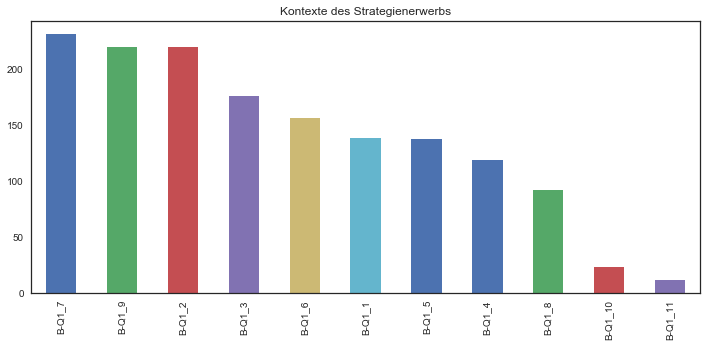

In [174]:
DF_Kontexte.iloc[1].sort_values(ascending = False).plot(kind='bar', 
                                                            figsize = (12,5), width = 0.5, 
                                                            legend = False, title = "Kontexte des Strategienerwerbs");

* 1- En las clases de Lengua y Literatura en el colegio o instituto
* 2- En las clases de inglés en el colegio o instituto
* 3- En otras clases de idiomas en el colegio o instituto
* 4- En clases de alemán anteriores en la Universidad
* 5- En otras asignaturas de mi carrera universitaria
* 6- En clases de lenguas en escuelas de idiomas o academias
* 7- En mi curso de alemán actual
* 8- En mi familia, con mis amigos/as o compañeros/as de clase
* 9- Por mi cuenta, sin ayuda de otras personas
* 10- Otros:
* 11- No sé cómo he aprendido estas estrategias.

#### B-Q2 (Methoden des Strategienerwerbs)

Erwerbskontexte:

In [175]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

Methoden des Stragienerwerbs (kontextübergreifend in Unterrichtssituationen):

In [176]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6'],
         'U7': ['B-Q2-1_7','B-Q2-2_7','B-Q2-3_7','B-Q2-4_7','B-Q2-5_7','B-Q2-6_7','B-Q2-7_7']}

Auswahl der TN, die mindestens einmal eine bestimmte Methode angegeben haben:

In [240]:
Stud_U1 = Finished[(Finished['B-Q2-1_1'] == 1) | (Finished['B-Q2-2_1'] == 1) | (Finished['B-Q2-3_1'] == 1) | (Finished['B-Q2-4_1'] == 1) | (Finished['B-Q2-5_1'] == 1) | (Finished['B-Q2-6_1'] == 1) | (Finished['B-Q2-7_1'] == 1)]
Stud_U2 = Finished[(Finished['B-Q2-1_2'] == 1) | (Finished['B-Q2-2_2'] == 1) | (Finished['B-Q2-3_2'] == 1) | (Finished['B-Q2-4_2'] == 1) | (Finished['B-Q2-5_2'] == 1) | (Finished['B-Q2-6_2'] == 1) | (Finished['B-Q2-7_2'] == 1)]
Stud_U3 = Finished[(Finished['B-Q2-1_3'] == 1) | (Finished['B-Q2-2_3'] == 1) | (Finished['B-Q2-3_3'] == 1) | (Finished['B-Q2-4_3'] == 1) | (Finished['B-Q2-5_3'] == 1) | (Finished['B-Q2-6_3'] == 1) | (Finished['B-Q2-7_3'] == 1)]
Stud_U4 = Finished[(Finished['B-Q2-1_4'] == 1) | (Finished['B-Q2-2_4'] == 1) | (Finished['B-Q2-3_4'] == 1) | (Finished['B-Q2-4_4'] == 1) | (Finished['B-Q2-5_4'] == 1) | (Finished['B-Q2-6_4'] == 1) | (Finished['B-Q2-7_4'] == 1)]
Stud_U5 = Finished[(Finished['B-Q2-1_5'] == 1) | (Finished['B-Q2-2_5'] == 1) | (Finished['B-Q2-3_5'] == 1) | (Finished['B-Q2-4_5'] == 1) | (Finished['B-Q2-5_5'] == 1) | (Finished['B-Q2-6_5'] == 1) | (Finished['B-Q2-7_5'] == 1)]
Stud_U6 = Finished[(Finished['B-Q2-1_6'] == 1) | (Finished['B-Q2-2_6'] == 1) | (Finished['B-Q2-3_6'] == 1) | (Finished['B-Q2-4_6'] == 1) | (Finished['B-Q2-5_6'] == 1) | (Finished['B-Q2-6_6'] == 1) | (Finished['B-Q2-7_6'] == 1)]

In [241]:
Stud_U = []
Stud_U.append(Stud_U1.shape[0])
Stud_U.append(Stud_U2.shape[0])
Stud_U.append(Stud_U3.shape[0])
Stud_U.append(Stud_U4.shape[0])
Stud_U.append(Stud_U5.shape[0])
Stud_U.append(Stud_U6.shape[0])

In [242]:
Stud_U = pd.Series(Stud_U)
Stud_U.index += 1

In [243]:
Stud_E8 = Finished[(Finished['B-Q2-8_1'] == 1) | (Finished['B-Q2-8_2'] == 1) | (Finished['B-Q2-8_3'] == 1) | (Finished['B-Q2-8_4'] == 1) | (Finished['B-Q2-8_5'] == 1)]
Stud_E9 = Finished[(Finished['B-Q2-9_1'] == 1) | (Finished['B-Q2-9_2'] == 1) | (Finished['B-Q2-9_3'] == 1) | (Finished['B-Q2-9_4'] == 1) | (Finished['B-Q2-9_5'] == 1)]

##### Methoden des Strategienerwerbs nach Erwerbskontexten

Aufgrund der Beschränkungen der Papier-Version des Fragebogens hinsichtlich der Implementierung von Filterfragen können die Angaben dieser TN großteils nicht in die Auswertung der Methoden des Strategienerwerbs nach Erwerbskontexten miteinbezogen werden, da Methoden und Unterrichtskontexte nicht immer eindeutig zugeordnet werden können. Im Fall von Erwerb im sozialen Umfeld oder autonom besteht diese Problematik nicht, die Daten können für die Analyse genutzt werden. 

In [181]:
Finished[Finished['IPAddress']!='2.154.100.40'][erwerb['E1']].apply(sum).sort_values(ascending = False)

B-Q2-1_6    71
B-Q2-1_2    59
B-Q2-1_3    52
B-Q2-1_1    42
B-Q2-1_5    25
B-Q2-1_4     9
B-Q2-1_7     6
dtype: int64

1.	Las estrategias se presentaron (y explicaron) en clase.
2.	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* Se probaron y se compararon diferentes estrategias.
* Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* Otros:

In [182]:
Finished[Finished['B-Q2-1_7_TEXT'] != 0]['B-Q2-1_7_TEXT']

54                                Mi madre me las enseñó
202                 Intuición y devoción por las lenguas
267    las he aprendido por los profesores [comentari...
272                                         por mi parte
343    tambien al traducir latín y griego clásico al ...
358    Gran parte fue gracias a dos buenos profesores...
400    Creo que es una combinación que las estrategia...
Name: B-Q2-1_7_TEXT, dtype: object

In [183]:
DF_Erwerb = pd.DataFrame(np.nan, columns=list(erwerb.keys())[:7], index = [1,2,3,4,5,6,7])

In [184]:
for key in list(erwerb.keys())[:7]:
    DF_Erwerb[key] = Finished[Finished['IPAddress']!='2.154.100.40'][erwerb[key]].sum().values

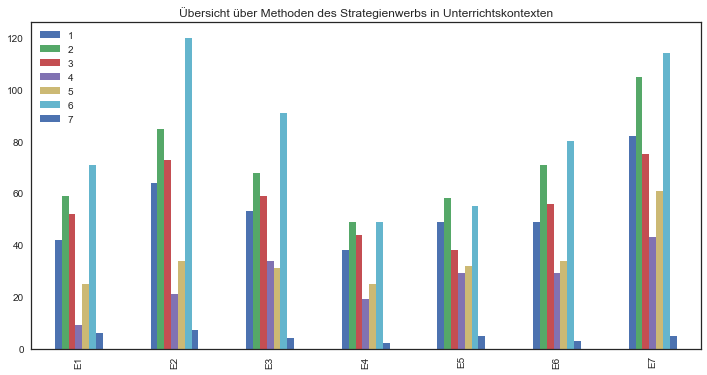

In [185]:
DF_Erwerb.T.plot(kind = 'bar', figsize = (12,6), title = 'Übersicht über Methoden des Strategienwerbs in Unterrichtskontexten');

In [246]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False)

B-Q2-8_3    66
B-Q2-8_2    40
B-Q2-8_4    39
B-Q2-8_1    31
B-Q2-8_5     6
dtype: int64

* (1)	He conocido estas estrategias en mi familia.
* (2)	He conocido estas estrategias hablando con amigos/as y conocidos/as.
* (3)	He conocido estas estrategias hablando con compañeros/as de clase.
* (4)	He conocido estas estrategias imitando hábitos de trabajo de compañeros/as de clase aventajados/as.
* (5)	Otros:

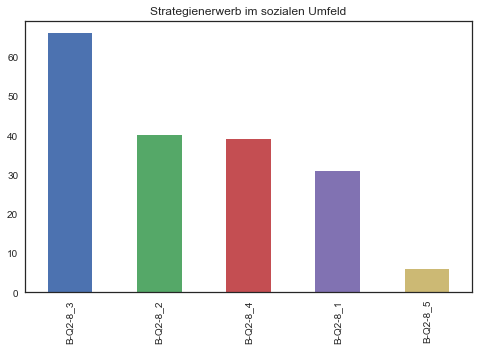

In [244]:
Finished[erwerb['E8']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Strategienerwerb im sozialen Umfeld");

In [245]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False)

B-Q2-9_1    177
B-Q2-9_2    150
B-Q2-9_3     53
B-Q2-9_4     49
B-Q2-9_5     17
dtype: int64

* (1)	He desarrollado estas estrategias por mi cuenta durante el aprendizaje y el uso de idiomas, p. ej. leyendo textos difíciles.
* (2)	He probado diferentes cosas y me he dado cuenta de qué funciona mejor para mi.
* (3)	He aprendido estas estrategias con ayuda de páginas web o blogs.
* (4)	He aprendido estas estrategias con ayuda de libros.
* (5)	He aprendido estas estrategias con ayuda de otros materiales. (Opcional: Cuáles?)

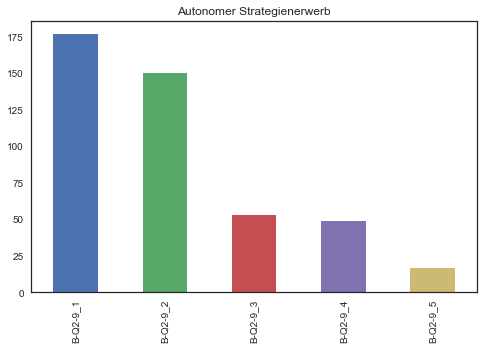

In [189]:
Finished[erwerb['E9']].apply(sum).sort_values(ascending = False).plot(kind='bar', 
                                                                    figsize = (8,5), width = 0.5, 
                                                                    legend = False, title = "Autonomer Strategienerwerb");

##### Übersicht über Methoden des Strategienerwerbs in Unterrichtskontexten

In [191]:
Erwerb_U = []
for lst in erwerb1:
        Erwerb_U.append(Finished[Finished['IPAddress']!='2.154.100.40'][erwerb1[lst]].apply(pd.value_counts).astype(integer).iloc[1].sum())

In [192]:
Erwerb_U

[377, 495, 397, 184, 242, 580, 32]

In [193]:
Erwerb_U = pd.Series(Erwerb_U)

In [194]:
Erwerb_U.index += 1

In [195]:
Erwerb_U.sort_values(ascending = False)

6    580
2    495
3    397
1    377
5    242
4    184
7     32
dtype: int64

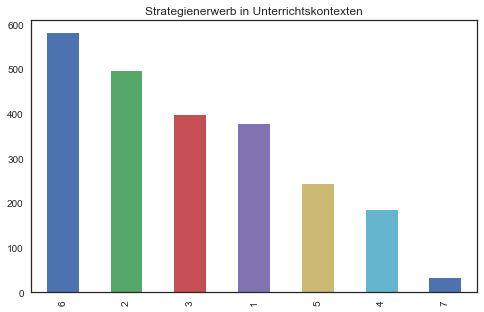

In [196]:
Erwerb_U.sort_values(ascending = False).plot(kind='bar', 
                                        figsize = (8,5), width = 0.5, 
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

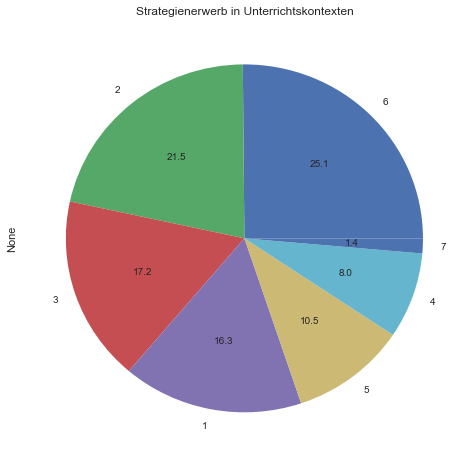

In [197]:
Erwerb_U.sort_values(ascending = False).plot(kind='pie', 
                                        figsize = (8,8), autopct='%.1f',
                                        legend = False, title = "Strategienerwerb in Unterrichtskontexten");

* (1)	Las estrategias se presentaron (y explicaron) en clase.
* (2)	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* (3)	Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* (4)	Se probaron y se compararon diferentes estrategias.
* (5)	Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* (6)	Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* (7)	Otros:

In [247]:
Stud_U.sort_values(ascending=False)

6    263
2    247
1    201
3    198
5    148
4    114
dtype: int64

#### B-Q3 + B-Q4 (Strategienwerb im Rahmen der Befragung)

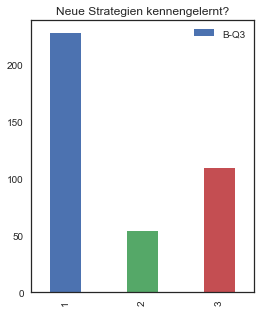

In [207]:
Finished['B-Q3'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien kennengelernt?");

(1) Ja
(2) Nein
(3) Vielleicht

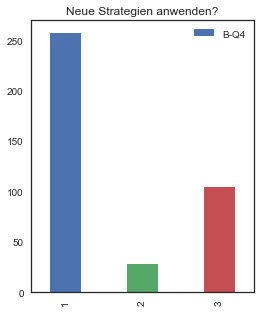

In [208]:
Finished['B-Q4'].value_counts()[[1,2,3]].plot(kind = 'bar', figsize = (4,5), width = 0.4, legend = True, title = "Neue Strategien anwenden?");

### Einstellung zu Erschließungsstrategien

#### C-Q1

In [209]:
Finished[Liste_C_Q1].describe()

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,3.529412,3.647059,3.831202,4.401535,4.432225,4.278772,2.554987
std,0.884933,1.108584,1.077580,0.828900,0.757787,0.845219,1.170763
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000
50%,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,2.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


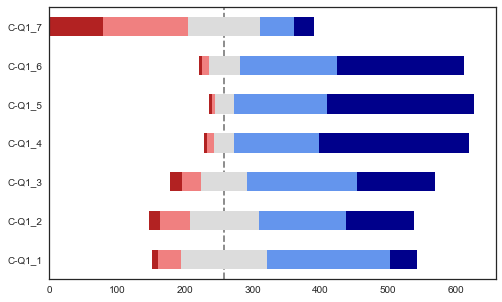

In [210]:
graf_likert(Finished,Liste_C_Q1,5)

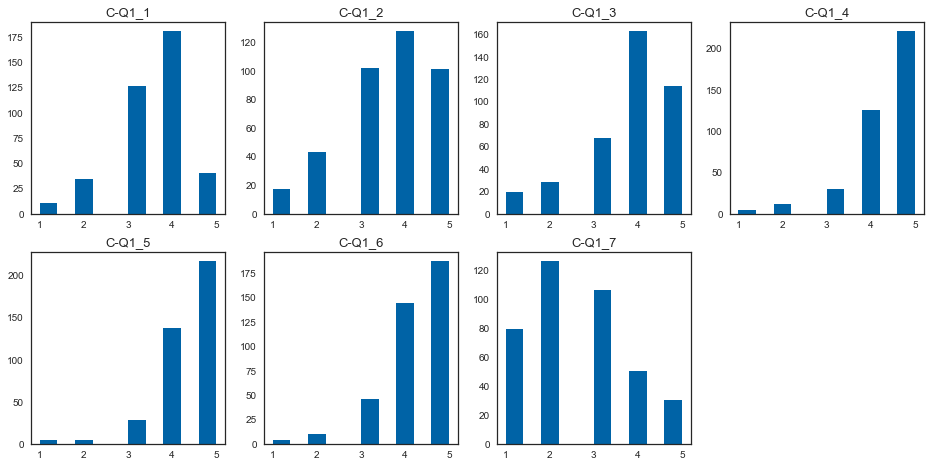

In [211]:
graf_hist(Finished,Liste_C_Q1,16,12,3,4)

1
Pienso que en alemán utilizo estas estrategias con éxito. 

2
Estas estrategias son un tema importante en mis clases de alemán.

3
Utilizo estas estrategias a menudo fuera del aula, p. ej. cuando leo textos en alemán en mi tiempo libre.

4
Estas estrategias son útiles para ampliar el vocabulario en alemán.

5
Estas estrategias son útiles para entender mejor textos en alemán.

6
Estas estrategias deberían explicarse y practicarse en las clases de alemán.

7
No hace falta aprender estas estrategias, ya que las usamos en cualquier caso de forma inconsciente. 


Korrelation in C-Q1:

In [248]:
Korr_C_Q1 = Daten[Liste_C_Q1].corr(method = 'spearman')
Korr_C_Q1 = Korr_C_Q1.style.applymap(lambda x: 'background-color : salmon' if abs(x) > 0.5 
                           else 'background-color: lightsalmon' if abs(x) > 0.3 and abs(x) <= 0.5
                           else 'background-color: peachpuff' if abs(x) > 0.1 and abs(x) <= 0.3
                           else 'background-color : white')
Korr_C_Q1

,C-Q1_1,C-Q1_2,C-Q1_3,C-Q1_4,C-Q1_5,C-Q1_6,C-Q1_7
C-Q1_1,1,0.18886,0.474697,0.339093,0.379286,0.16494,0.132772
C-Q1_2,0.18886,1,0.115184,0.276655,0.328676,0.306114,-0.0428222
C-Q1_3,0.474697,0.115184,1,0.26301,0.38752,0.123883,0.116588
C-Q1_4,0.339093,0.276655,0.26301,1,0.573939,0.325098,-0.14857
C-Q1_5,0.379286,0.328676,0.38752,0.573939,1,0.348164,-0.0489606
C-Q1_6,0.16494,0.306114,0.123883,0.325098,0.348164,1,-0.158655
C-Q1_7,0.132772,-0.0428222,0.116588,-0.14857,-0.0489606,-0.158655,1
